In [14]:
import random   #using the a* search in a N*N maze  
import queue
maze={} # to store adjacency list representing maze
visited={} # to store visited cells while doing search
def dfs(grid,visited,start,maze):  # to create adjacency list of maze
    
    visited[start]=1    
    x=0
    
    for i in range(len(grid[start])):
        if visited[tuple(grid[start][i])] == 0 :
            x=1  # to check whether is there any unvisited cell
            break
    while x==1 :  
        rand = random.choice(grid[start])  # choosing random neighbour of current cell
        
        if visited[tuple(rand)]==0 :
            
            maze[start].append(rand)  # adding selected cell to adjacency list of the current cell
            maze[tuple(rand)].append(list(start))
            dfs(grid,visited,tuple(rand),maze) # doing recursion
            x=0
            for i in range(len(grid[start])):
                if visited[tuple(grid[start][i])] == 0 :
                    x=1
                    break
            
def printMaze(maze,n): # to print maze
    for i in range(n):
        for j in range(n):
            if(i == 0 ):
                print("+--",end="")  # border  is same everytime
            else :
                if [j,n-i] not in maze[(j,n-i-1)] : # if these cells are not adjacent, then adding wall
                    print("+--",end="")
                else :
                    print("+  ",end="")  # removing wall
        print("+")
        for j in range(n):
            if(j==0):   # border  is same everytime
                print("|  ",end="")
            else :
                if [j-1,n-i-1] not in maze[(j,n-i-1)] :   # if these cells are not adjacent, then adding wall
                    print("|  ",end="")
                else :
                    print("   ",end="")   # removing wall
        print("|")
    for i in range(n):
        print("+--",end="")  # printing bottomost border walls
    print("+")
def generateMaze(n):
    global maze
    global visited
    ne = {}  # to store all neigbhours for every cell
    for i in range(n):
        for j in range(n):
            maze.update({(i,j):[]}) #initialising maze
            visited.update({(i,j):0}) #initialising visited list
            if(i ==0):
                if(j == 0):
                    ne.update({(i,j):[[i+1,j], [i,j+1]]})  #adding all possible neighbour of (i,j)
                elif(j== n-1):
                    ne.update({(i,j):[[i+1,j], [i,j-1]]})    #adding all possible neighbour of (i,j)
                else :
                    ne.update({(i,j):[[i+1,j], [i,j+1],[i,j-1]]})   #adding all possible neighbour of (i,j)
            elif(i==n-1):
                if(j == 0):
                    ne.update({(i,j):[[i-1,j], [i,j+1]]})   #adding all possible neighbour of (i,j)
                elif(j== n-1):
                    ne.update({(i,j):[[i-1,j], [i,j-1]]})   #adding all possible neighbour of (i,j)
                else :
                    ne.update({(i,j):[[i-1,j], [i,j+1],[i,j-1]]})   #adding all possible neighbour of (i,j)
            elif(j== 0):
                
                ne.update({(i,j):[[i+1,j], [i,j+1],[i-1,j]]})   #adding all possible neighbour of (i,j)
            elif(j==n-1):
                ne.update({(i,j):[[i+1,j], [i,j-1],[i-1,j]]})   #adding all possible neighbour of (i,j)
            else :
                ne.update({(i,j):[[i-1,j], [i,j+1],[i,j-1],[i+1,j]]})   #adding all possible neighbour of (i,j)
    dfs(ne,visited,(0,0),maze)  # calling dfs to generate maze
    for i in maze.keys():
        print(f"{i} : {maze[i]}") # printing adjacency list of maze
   
    printMaze(maze,n)  # printing maze

def total_cost(cell,goal,c): # to find total cost for going from cell to goal
    x= abs(cell[0]-goal[0])+abs(cell[1]-goal[1])+c  # addinng manhattan distance and cost of reaching from (0,0) to cell
    return x
def A_search(maze,n):
    path=[]  # to store path from (0,0) to (n-1,n-1)
    num =0 # to store number of cells explored
    cost={} #to store cost of reaching from (0,0) to every cell
    q= queue.PriorityQueue()  # creating a priority queue 
    z= total_cost((0,0),(n-1,n-1),0)  # total cost to reach (n-1,n-1) from (0,0)
    q.put((z,(0,0))) # adding (0,0) to queue, with it's corresponding cost
    parent={}  # to store parent for every cells in bfs tree
    p=0
    for i in range(n):
        for j in range(n):
            cost.update({(i,j):0})  #initialising cost
            visited.update({(i,j):0})  #initialising visited list
            parent.update({(i,j):[]})   #initialising parent
    visited[(0,0)]=1
    while(q.empty() == 0):
        a= q.get()[1] # dequeue cell with lowest total cost
        num+=1
        
        if(a==(n-1,n-1)) :
            p=1  # (n-1,n-1) found
            break
        
        for i in range(len(maze[a])):
            x= tuple(maze[a][i])
            if visited[x] ==0 :
                cost[x] = cost[a]+1  # cost of reaching x from (0,0)
                z= total_cost(x,(n-1,n-1),cost[x])   # total cost to reach (n-1,n-1) from x
                q.put((z,x))  # enqueue x 
                visited[x]=1
                parent[x]= list(a)
    
    x=(n-1,n-1)
    path.append(x)
        
    while(parent[x] !=[0,0]): 
        x = tuple(parent[x])  
        path.append(x)  # storing bactraking path from (n-1,n-1) to (0,0)
    path.append((0,0))
    path = path[::-1]  #reversing path
    return path,num
                
n = int(input("enter the value of n: "))  # taking as input

generateMaze(n) # calling generateMaze


path,num= A_search(maze,n)  # calling A_search

print(f"Number of nodes explored are {num}")
if len(path) == 0 :
    print(f"There is no path from [0,0] to {[n-1,n-1]}")
else :
    
    print(path)

enter the value of n:  4


(0, 0) : [[1, 0]]
(0, 1) : [[1, 1], [0, 2]]
(0, 2) : [[0, 1], [0, 3]]
(0, 3) : [[0, 2], [1, 3]]
(1, 0) : [[0, 0], [2, 0]]
(1, 1) : [[1, 2], [0, 1]]
(1, 2) : [[2, 2], [1, 1]]
(1, 3) : [[0, 3], [2, 3]]
(2, 0) : [[1, 0], [3, 0]]
(2, 1) : [[3, 1], [2, 2]]
(2, 2) : [[2, 1], [1, 2]]
(2, 3) : [[1, 3], [3, 3]]
(3, 0) : [[2, 0], [3, 1]]
(3, 1) : [[3, 0], [2, 1]]
(3, 2) : [[3, 3]]
(3, 3) : [[2, 3], [3, 2]]
+--+--+--+--+
|           |
+  +--+--+  +
|  |     |  |
+  +  +  +--+
|     |     |
+--+--+--+  +
|           |
+--+--+--+--+
Number of nodes explored are 15
[(0, 0), (1, 0), (2, 0), (3, 0), (3, 1), (2, 1), (2, 2), (1, 2), (1, 1), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (3, 3)]


In [ ]:
import random
import queue
import matplotlib.pyplot as plt

maze = {}
visited = {}


def dfs(grid, visited, start, maze):
    visited[start] = 1
    x = 0

    for i in range(len(grid[start])):
        if visited[tuple(grid[start][i])] == 0:
            x = 1
            break
    while x == 1:
        rand = random.choice(grid[start])

        if visited[tuple(rand)] == 0:
            maze[start].append(rand)
            maze[tuple(rand)].append(list(start))
            dfs(grid, visited, tuple(rand), maze)
            x = 0
            for i in range(len(grid[start])):
                if visited[tuple(grid[start][i])] == 0:
                    x = 1
                    break


def printMaze(maze, n):
    for i in range(n):
        for j in range(n):
            if i == 0:
                print("+--", end="")
            else:
                if [j, n - i] not in maze[(j, n - i - 1)]:
                    print("+--", end="")
                else:
                    print("+  ", end="")
        print("+")
        for j in range(n):
            if j == 0:
                print("|  ", end="")
            else:
                if [j - 1, n - i - 1] not in maze[(j, n - i - 1)]:
                    print("|  ", end="")
                else:
                    print("   ", end="")
        print("|")
    for i in range(n):
        print("+--", end="")
    print("+")


def generateMaze(n):
    global maze
    global visited
    ne = {}
    for i in range(n):
        for j in range(n):
            maze.update({(i, j): []})
            visited.update({(i, j): 0})
            if i == 0:
                if j == 0:
                    ne.update({(i, j): [[i + 1, j], [i, j + 1]]})
                elif j == n - 1:
                    ne.update({(i, j): [[i + 1, j], [i, j - 1]]})
                else:
                    ne.update({(i, j): [[i + 1, j], [i, j + 1], [i, j - 1]]})
            elif i == n - 1:
                if j == 0:
                    ne.update({(i, j): [[i - 1, j], [i, j + 1]]})
                elif j == n - 1:
                    ne.update({(i, j): [[i - 1, j], [i, j - 1]]})
                else:
                    ne.update({(i, j): [[i - 1, j], [i, j + 1], [i, j - 1]]})
            elif j == 0:
                ne.update({(i, j): [[i + 1, j], [i, j + 1], [i - 1, j]]})
            elif j == n - 1:
                ne.update({(i, j): [[i + 1, j], [i, j - 1], [i - 1, j]]})
            else:
                ne.update({(i, j): [[i - 1, j], [i, j + 1], [i, j - 1], [i + 1, j]]})
    dfs(ne, visited, (0, 0), maze)
    for i in maze.keys():
        print(f"{i} : {maze[i]}")
    printMaze(maze, n)


def total_cost(cell, goal, c):
    x = abs(cell[0] - goal[0]) + abs(cell[1] - goal[1]) + c
    return x


def A_search(maze, n, start, goal):
    path = []
    num = 0
    cost = {}
    q = queue.PriorityQueue()
    z = total_cost(start, goal, 0)
    q.put((z, start))
    parent = {}
    p = 0
    for i in range(n):
        for j in range(n):
            cost.update({(i, j): 0})
            visited.update({(i, j): 0})
            parent.update({(i, j): []})
    visited[start] = 1
    while q.empty() == 0:
        a = q.get()[1]
        num += 1

        if a == goal:
            p = 1
            break

        for i in range(len(maze[a])):
            x = tuple(maze[a][i])
            if visited[x] == 0:
                cost[x] = cost[a] + 1
                z = total_cost(x, goal, cost[x])
                q.put((z, x))
                visited[x] = 1
                parent[x] = list(a)

    x = goal
    path.append(x)

    while parent[x] != list(start):
        x = tuple(parent[x])
        path.append(x)
    path.append(start)
    path = path[::-1]

    return path, num


n = int(input("Enter the value of n: "))

generateMaze(n)

start_node = tuple(map(int, input("Enter the start node (row column): ").split()))
goal_node = tuple(map(int, input("Enter the goal node (row column): ").split()))

path, num = A_search(maze, n, start_node, goal_node)

print(f"Number of nodes explored are {num}")
if len(path) == 0:
    print(f"There is no path from {start_node} to {goal_node}")
else:
    print(path)


    # Plotting the maze and path
    plt.figure()
    for i in maze.keys():
        for j in maze[i]:
            plt.plot([i[0], j[0]], [i[1], j[1]], 'k-', lw=1, alpha=0.5)

    for i in range(len(path) - 1):
        plt.plot([path[i][0], path[i + 1][0]], [path[i][1], path[i + 1][1]], 'ro--')

    plt.title('Maze with Path')
    plt.xlabel('Row')
    plt.ylabel('Column')
    plt.show()



Enter the value of n:  5


(0, 0) : [[0, 1]]
(0, 1) : [[0, 0], [0, 2]]
(0, 2) : [[0, 1], [1, 2]]
(0, 3) : [[0, 4]]
(0, 4) : [[1, 4], [0, 3]]
(1, 0) : [[1, 1]]
(1, 1) : [[2, 1], [1, 0]]
(1, 2) : [[0, 2], [2, 2]]
(1, 3) : [[2, 3], [1, 4]]
(1, 4) : [[1, 3], [0, 4], [2, 4]]
(2, 0) : [[3, 0], [2, 1]]
(2, 1) : [[2, 0], [1, 1]]
(2, 2) : [[1, 2], [2, 3]]
(2, 3) : [[2, 2], [1, 3]]
(2, 4) : [[1, 4], [3, 4]]
(3, 0) : [[3, 1], [4, 0], [2, 0]]
(3, 1) : [[4, 1], [3, 0], [3, 2]]
(3, 2) : [[3, 1], [3, 3]]
(3, 3) : [[3, 2]]
(3, 4) : [[2, 4], [4, 4]]
(4, 0) : [[3, 0]]
(4, 1) : [[4, 2], [3, 1]]
(4, 2) : [[4, 3], [4, 1]]
(4, 3) : [[4, 4], [4, 2]]
(4, 4) : [[3, 4], [4, 3]]
+--+--+--+--+--+
|              |
+  +  +--+--+  +
|  |     |  |  |
+--+--+  +  +  +
|        |  |  |
+  +--+--+  +  +
|  |     |     |
+  +  +  +  +--+
|  |  |        |
+--+--+--+--+--+


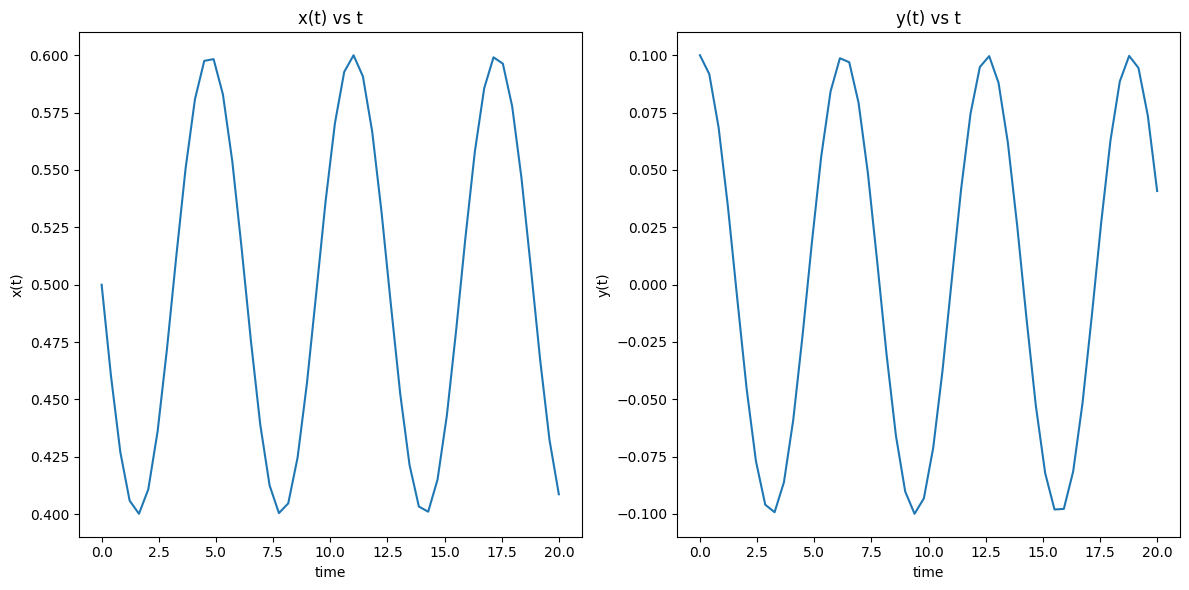

In [4]:
# the final plots of x(t) and y(t) using the kinematic equation
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

v = 0.1
w = 1
X0 = [0.5, 0.1, np.pi]

t = np.linspace(0,20)

def model(x, t, v, w):
    dxdt = v * np.cos(x[2])
    dydt = v * np.sin(x[2])
    dthetadt = w
    dX = [dxdt, dydt, dthetadt]
    return dX

Y = odeint(model, X0, t, args=(v, w))

# Create two subplots, one for x(t) and one for y(t)
plt.figure(figsize=(12, 6))

plt.subplot(121)  # Left subplot for x(t)
plt.plot(t, Y[:, 0])
plt.xlabel("time")
plt.ylabel("x(t)")
plt.title("x(t) vs t")

plt.subplot(122)  # Right subplot for y(t)
plt.plot(t, Y[:, 1])
plt.xlabel("time")
plt.ylabel("y(t)")
plt.title("y(t) vs t")

plt.tight_layout()  # Adjust the layout for better spacing

plt.show()


In [ ]:
## import queue  # Import the queue module for implementing a priority queue
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Define a fixed maze with known obstacles
maze = {
    (0, 0): [(0, 1)],
    (0, 1): [(0, 0), (1, 1)],
    (1, 0): [(1, 1)],
    (1, 1): [(0, 1), (1, 0), (1, 2)],
    (1, 2): [(1, 1), (2, 2)],
    (2, 0): [(2, 1)],
    (2, 1): [(2, 0), (2, 2)],
    (2, 2): [(1, 2)]
}

# Define a heuristic function for A* algorithm
def total_cost(cell, goal, c):
    x = abs(cell[0] - goal[0]) + abs(cell[1] - goal[1]) + c
    return x

# A* Search Algorithm Function
def A_search(maze, n, start, goal):
    path = []  # List to store the optimal path
    num = 0  # Variable to count the number of nodes explored
    cost = {start: 0}  # Dictionary to store the cost to reach each cell
    q = queue.PriorityQueue()  # Priority queue for exploring cells based on cost
    z = total_cost(start, goal, 0)  # Calculate total cost for the start cell
    q.put((z, start))  # Enqueue the start cell with its total cost
    parent = {}  # Dictionary to store the parent cell for each cell in the path
    
    visited = set()  # Set to keep track of visited cells
    visited.add(start)  # Mark the start cell as visited

    # Main loop for A* search
    while not q.empty():
        a = q.get()[1]  # Dequeue the cell with the lowest total cost
        num += 1  # Increment the number of nodes explored

        if a == goal:  # If the goal is reached, break the loop
            break

        # Explore neighbors of the current cell
        for i in range(len(maze[a])):
            x = tuple(maze[a][i])

            if x not in visited:
                cost[x] = cost[a] + 1  # Update the cost to reach the neighbor
                z = total_cost(x, goal, cost[x])  # Calculate total cost for the neighbor
                q.put((z, x))  # Enqueue the neighbor with its total cost
                visited.add(x)  # Mark the neighbor as visited
                parent[x] = list(a)  # Set the parent of the neighbor

    # Reconstruct the optimal path from the goal to the start
    x = goal
    path.append(x)

    while x != start:
        x = tuple(parent[x])
        path.append(x)
    
    path = path[::-1]  # Reverse the path to get it from start to goal

    return path, num  # Return the optimal path and the number of nodes explored

# Assuming a 3x3 maze
n = 3

# Taking user input for start and goal nodes
start_node = tuple(map(int, input("Enter the start node (row column): ").split()))
goal_node = tuple(map(int, input("Enter the goal node (row column): ").split()))

# Finding and printing the path
path, num = A_search(maze, n, start_node, goal_node)
print(f"Number of nodes explored are {num}")

# Check if there is a valid path, and print the path if it exists
if len(path) == 0:
    print(f"There is no path from {start_node} to {goal_node}")
else:
    print(path)

    # Plotting the maze and path
    plt.figure()

    # Plot maze connections
    for i in maze.keys():
        for j in maze[i]:
            plt.plot([i[0], j[0]], [i[1], j[1]], 'k-', lw=1, alpha=0.5)

    # Plot the optimal path
    for i in range(len(path) - 1):
        plt.plot([path[i][0], path[i + 1][0]], [path[i][1], path[i + 1][1]], 'ro--')

    plt.title('Maze with Path')
    plt.xlabel('Row')
    plt.ylabel('Column')
    plt.show()


In [7]:
pip install queue


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement queue (from versions: none)
ERROR: No matching distribution found for queue

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
